In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/content/archive.zip')
df.head()

,Unnamed: 0,titles,brand_names,images_links,prices,offers,Gender,Type
0,0,NP2576WM01 Analog Watch - For Women,Titan,https://rukminim1.flixcart.com/image/612/612/l...,"₹3,754",20% off,Women,Analog
1,1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,https://rukminim1.flixcart.com/image/612/612/l...,₹270,86% off,Unisex,none
2,2,77085PP03 Volt Analog Watch - For Men,SONATA,https://rukminim1.flixcart.com/image/612/612/l...,₹524,25% off,Men,Analog
3,3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,https://rukminim1.flixcart.com/image/612/612/k...,₹319,82% off,Unisex,Analog
4,4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,https://rukminim1.flixcart.com/image/612/612/k...,₹343,61% off,Unisex,none


In [9]:
df.columns

Index(['Unnamed: 0', 'titles', 'brand_names', 'images_links', 'prices',
       'offers', 'Gender', 'Type'],
      dtype='object')

In [10]:
df = df.rename(columns={'titles': 'Titles', 'brand_names': 'Brand_names', 'images_links': 'Images_links', 
                        'prices': 'Prices', 'offers': 'Offers', 'Gender': 'Gender', 'Type': 'Type'})
df.head()

,Unnamed: 0,Titles,Brand_names,Images_links,Prices,Offers,Gender,Type
0,0,NP2576WM01 Analog Watch - For Women,Titan,https://rukminim1.flixcart.com/image/612/612/l...,"₹3,754",20% off,Women,Analog
1,1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,https://rukminim1.flixcart.com/image/612/612/l...,₹270,86% off,Unisex,none
2,2,77085PP03 Volt Analog Watch - For Men,SONATA,https://rukminim1.flixcart.com/image/612/612/l...,₹524,25% off,Men,Analog
3,3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,https://rukminim1.flixcart.com/image/612/612/k...,₹319,82% off,Unisex,Analog
4,4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,https://rukminim1.flixcart.com/image/612/612/k...,₹343,61% off,Unisex,none


In [11]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  975
Number of columns:  8


In [12]:
df.isnull().sum()

Unnamed: 0      0
Titles          0
Brand_names     0
Images_links    0
Prices          0
Offers          0
Gender          0
Type            0
dtype: int64

In [13]:
df['Prices'].describe()

count        975
unique       416
top       ₹3,754
freq          25
Name: Prices, dtype: object

In [14]:
df['Prices'] = df['Prices'].str.replace('₹','').str.replace(',','').astype(float)
df['Prices'].describe()

count      975.000000
mean      1319.820513
std       1642.262873
min        175.000000
25%        287.000000
50%        594.000000
75%       1647.000000
max      14950.000000
Name: Prices, dtype: float64

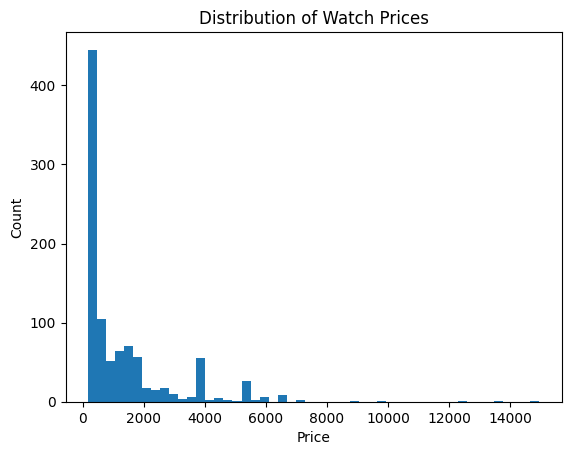

In [15]:
plt.hist(df['Prices'], bins=50)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Watch Prices')
plt.show()

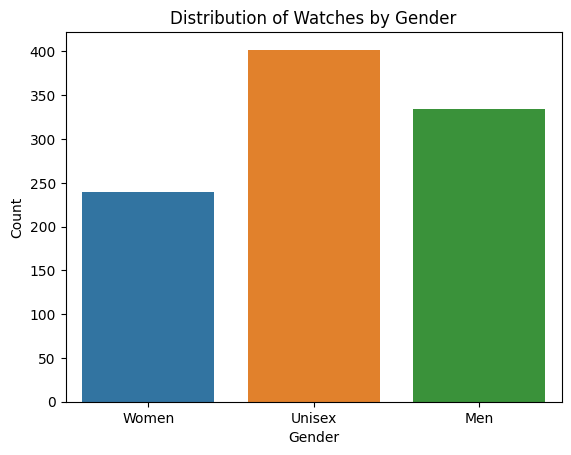

In [16]:
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Watches by Gender')
plt.show()

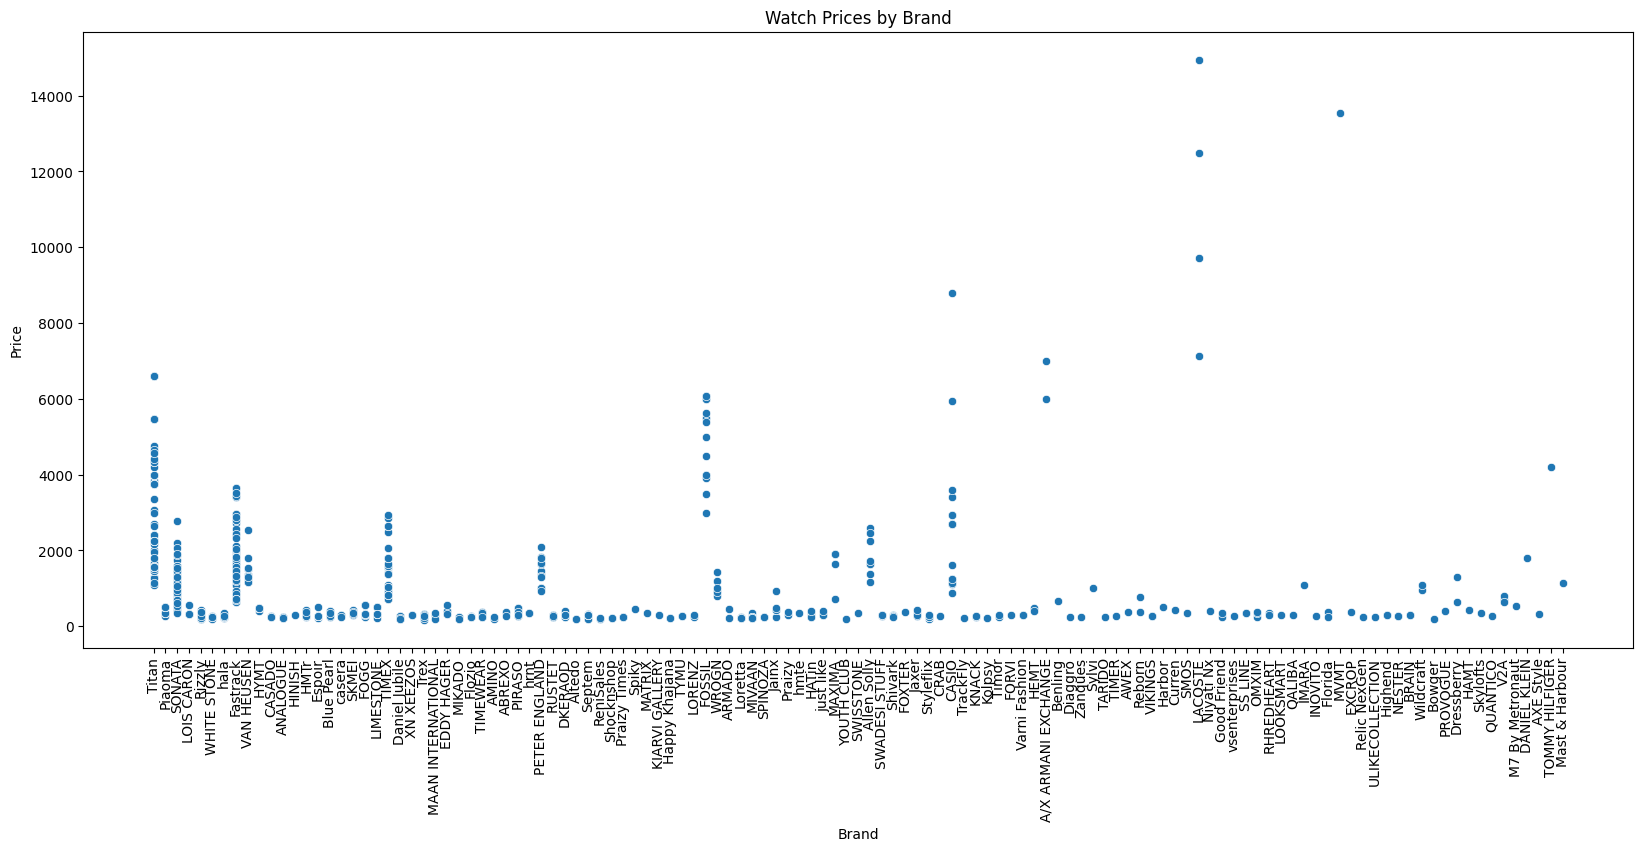

In [17]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Brand_names', y='Prices', data=df)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Watch Prices by Brand')
plt.show()

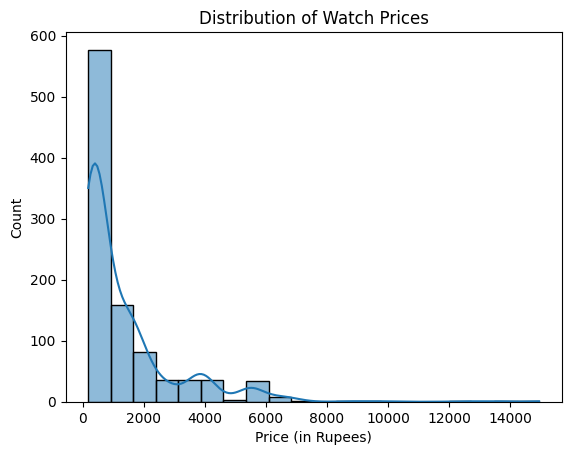

In [18]:
import seaborn as sns

sns.histplot(df['Prices'], bins=20, kde=True)
plt.title('Distribution of Watch Prices')
plt.xlabel('Price (in Rupees)')
plt.show()

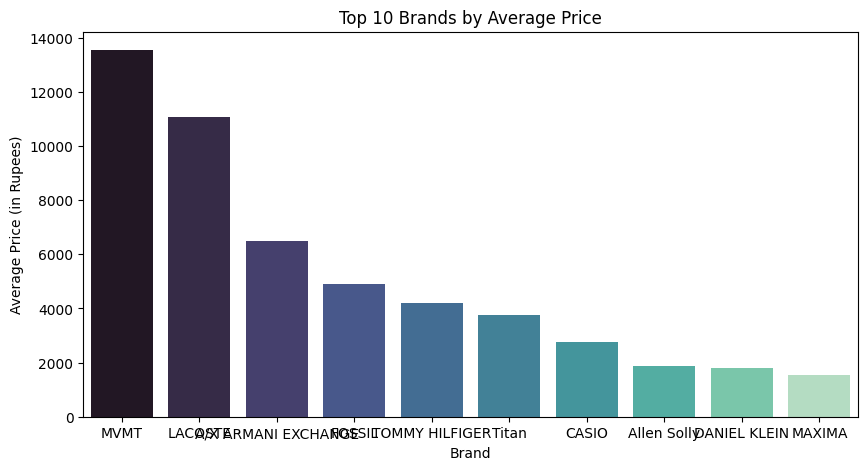

In [19]:
brand_prices = df.groupby('Brand_names')['Prices'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=brand_prices.index, y=brand_prices.values, palette='mako')
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price (in Rupees)')
plt.show()

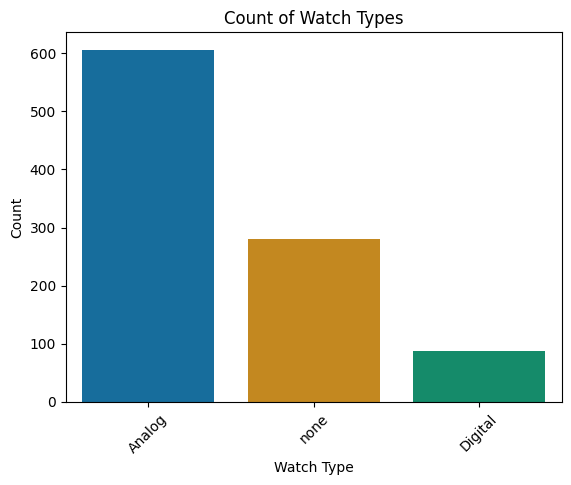

In [20]:
sns.countplot(data=df, x='Type', palette='colorblind')
plt.title('Count of Watch Types')
plt.xlabel('Watch Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

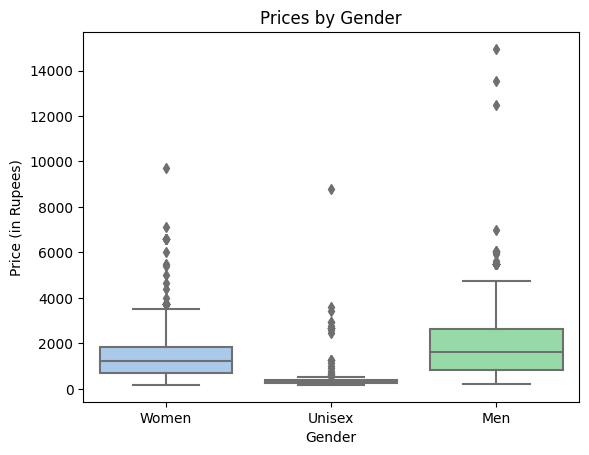

In [21]:
sns.boxplot(data=df, x='Gender', y='Prices', palette='pastel')
plt.title('Prices by Gender')
plt.xlabel('Gender')
plt.ylabel('Price (in Rupees)')
plt.show()

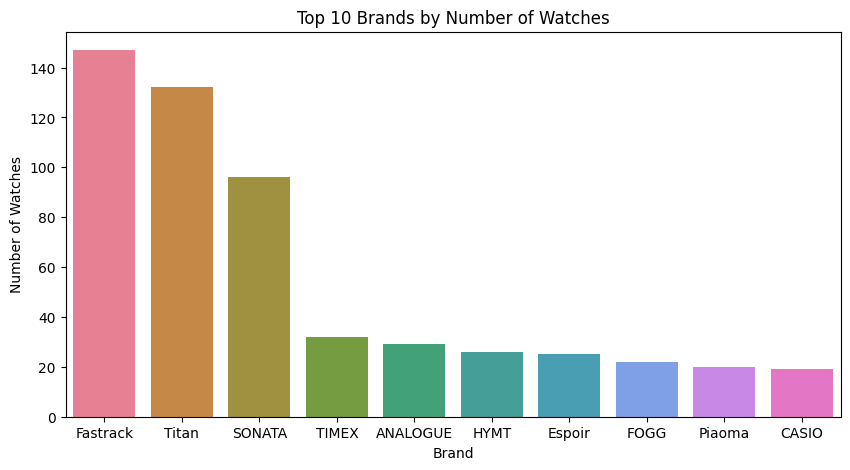

In [22]:
brand_counts = df['Brand_names'].value_counts()[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='husl')
plt.title('Top 10 Brands by Number of Watches')
plt.xlabel('Brand')
plt.ylabel('Number of Watches')
plt.show()

<ipython-input-23-197ce506c47a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Prices'], bins=30)


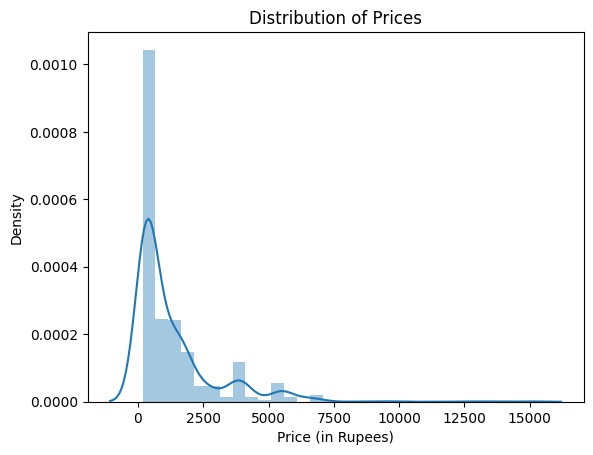

In [23]:
sns.distplot(df['Prices'], bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price (in Rupees)')
plt.ylabel('Density')
plt.show()

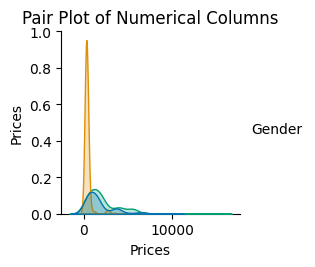

In [24]:
sns.pairplot(df[['Prices', 'Gender']], hue='Gender', palette='colorblind')
plt.title('Pair Plot of Numerical Columns')
plt.show()

<ipython-input-25-4edaf472a514>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['Prices', 'Gender']].corr()


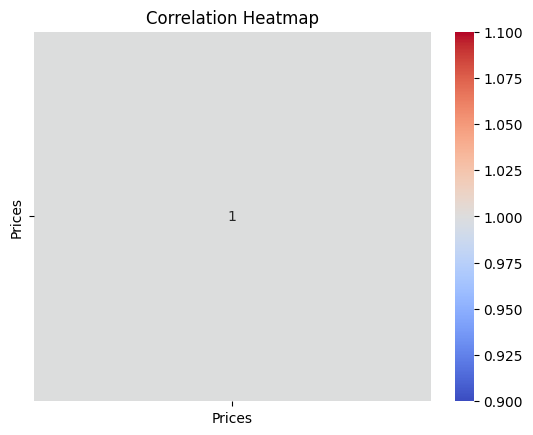

In [25]:
corr = df[['Prices', 'Gender']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()